In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score

# Regression

Term regression is used when need to find relationship ($r$) between variables.

- [Linear Regression](#linear-regression)
- [Polynomial Regression](#polynomial-regression)
- [Multiple Regression](#multiple-regression)
- [Logistic Regression](#logistic-regression)


# Linear Regression

Linear regression is used to find the common sector of multiple variables/data points and draw a straight line between them which allows to predict future values around the sector as well use in Machine Learning.

In [2]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

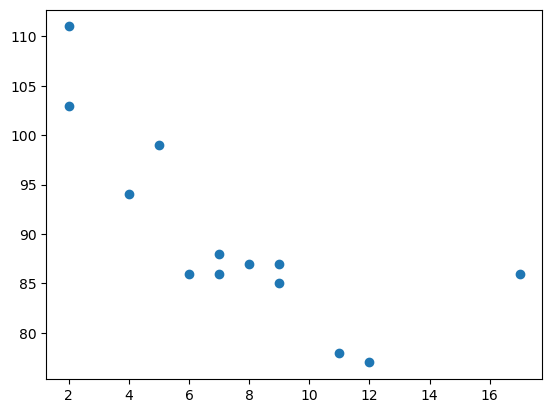

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
slope, intercept, _, _, _ = stats.linregress(x, y)
print(slope, intercept)

-1.751287711552612 103.10596026490066


In [5]:
def func(x):
    return slope * x + intercept

model = list(map(func, x))
model

[94.3495217071376,
 90.84694628403237,
 89.09565857247976,
 90.84694628403237,
 99.60338484179543,
 73.33406916850626,
 99.60338484179543,
 87.34437086092716,
 96.1008094186902,
 83.84179543782193,
 82.09050772626932,
 87.34437086092716,
 92.59823399558499]

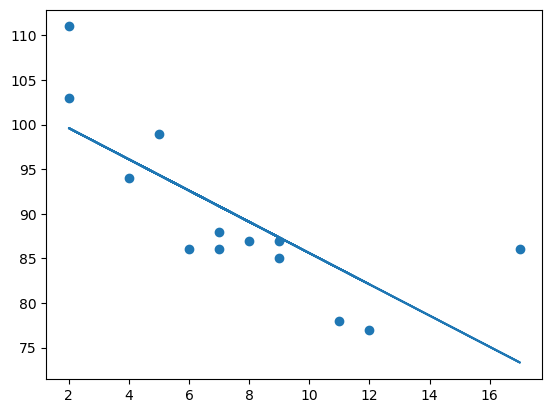

In [6]:
plt.scatter(x, y)
plt.plot(x, model)
plt.show()

### $r$ for Relationship

This relationship - the coefficient of correlation - is called $r$. The $r$ value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

In [7]:
slope, intercept, r, p, _ = stats.linregress(x, y)
r

-0.7585915243761551

> **Note:** The result -0.76 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.

### Predict Future Values when $r$ Value is Large

Now we have somewhat good relationship in **x** and **y** collections, try to predict the value _**speed**_ for 10 years old vehicle.

In [8]:
def new_func(x):
    return slope * x + intercept

In [9]:
new_speed10 = new_func(10)
new_speed20 = new_func(20)

new_speed10, new_speed20

(85.59308314937454, 68.08020603384841)

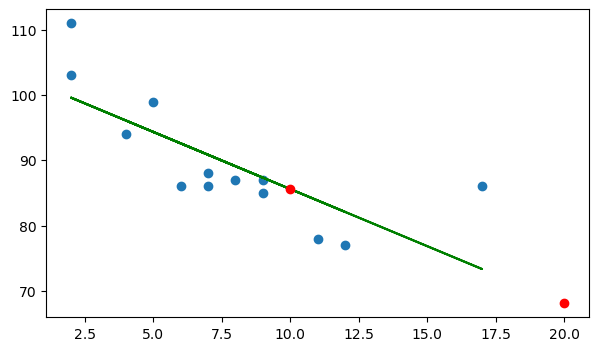

In [10]:
# Sample for - https://stackoverflow.com/questions/28504737/how-to-plot-a-single-point-in-matplotlib
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

plt.scatter(x, y)
plt.plot(x, model, '-g')
plt.plot(10, new_speed10, 'ro')
plt.plot(20, new_speed20, 'ro')
plt.show()

### Bad Fit (When $r$ Value is Too Small)

In [11]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

In [12]:
s, i, r, _, _ = stats.linregress(x, y)
s, i, r

(0.013916581398452667, 40.452282828936454, 0.013318141542974947)

In [13]:
def func(x):
    return s * x + i

In [14]:
model = list(map(func, x))
model

[41.69085857339874,
 41.050695829069916,
 40.95327975928075,
 40.95327975928075,
 41.77435806178946,
 40.59144864292098,
 41.37077720123433,
 40.925446596483845,
 40.981112922077656,
 40.730614456905506,
 40.81411394529622,
 40.85586368949158,
 41.12027873606218,
 41.34294403843742,
 40.53578231732717,
 40.52186573592872,
 40.95327975928075,
 41.37077720123433,
 41.45427668962505,
 41.00894608487456]

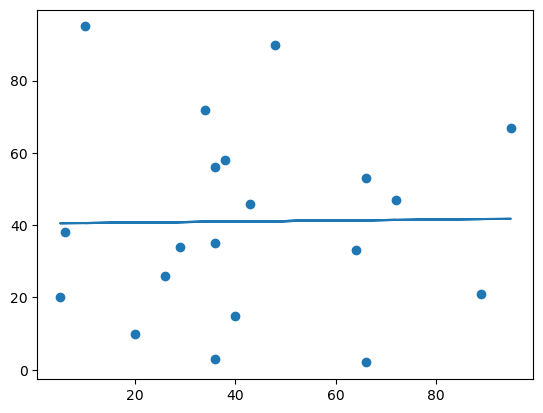

In [15]:
plt.scatter(x, y)
plt.plot(x, model)
plt.show()

> The result: $r = 0.013$ indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.

# Polynomial Regression

If the dataset not fit through a straight line and not suitable for **Linear Regression**, it might be suitable for **Polynomial Regression**. Just like in linear regression, polynomial regression uses relationship between $x$ and $y$ variables to find the best path between a dataset.

In [16]:
hour = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
speed = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

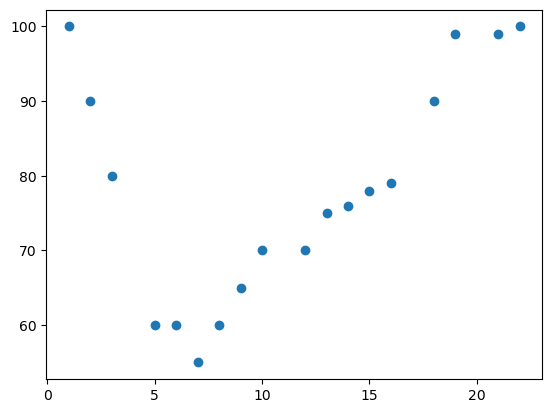

In [17]:
plt.scatter(hour, speed)
plt.show()

In [18]:
model = np.poly1d(np.polyfit(hour, speed, 3))

In [19]:
line = np.linspace(1, 22, 100)

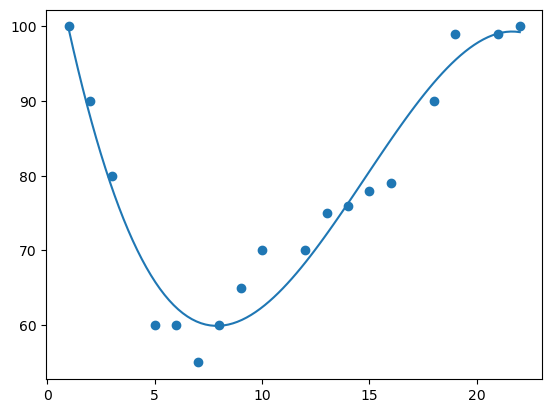

In [20]:
plt.scatter(hour, speed)
plt.plot(line, model(line))
plt.show()

### R - Squared ($r^2$)

It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

In [21]:
model = np.poly1d(np.polyfit(hour, speed, 3))

r2_score(speed, model(hour))

0.9432150416451025

### Predict Future Values

Now we can use the information we have gathered to predict future values.

Example: Let us try to predict the speed of a car that passes the tollbooth at around the time 17:00:

To do so, we need the same $model$ array from the example above:



In [22]:
model = np.poly1d(np.polyfit(hour , speed, 3))

In [23]:
new_speed30 = model(17)
new_speed30

88.87331269697988

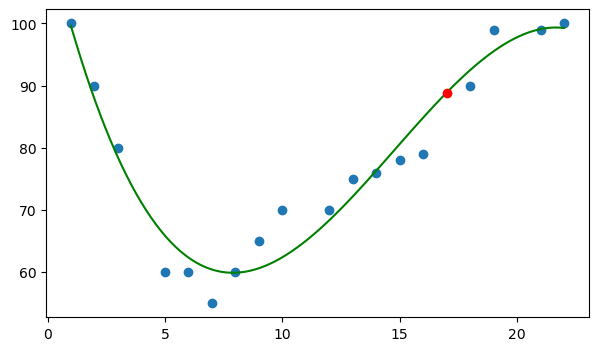

In [24]:
_, _ = plt.subplots(1, 1, figsize=(7, 4))

plt.scatter(hour, speed)

line = np.linspace(1, 22, 100)
plt.plot(line, model(line), '-g')
plt.plot(17, new_speed30, 'ro')

plt.show()

### Bad Fit (When $r$ value is out of range)

In [25]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

model = np.poly1d(np.polyfit(x, y, 3))
r2 = r2_score(y, model(x))

r2

0.009952707566680763

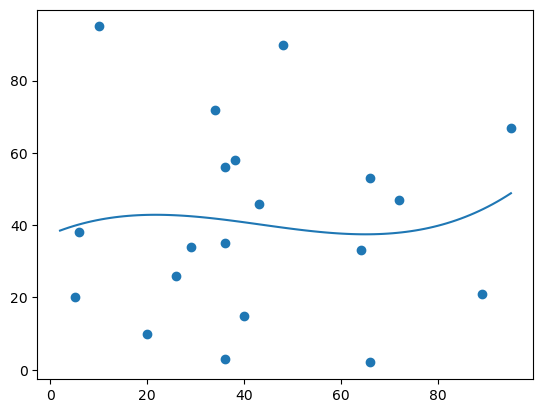

In [26]:
line = np.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(line, model(line))

plt.show()

# Multiple Regression

Multiple regression is like __linear regression__, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

In [27]:
import pandas
from sklearn import linear_model

In [28]:
df = pandas.read_csv('../../data.csv')
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


Make a list of the independent values and call this variable $X$.

Put the dependent values in a variable called $y$.

In [29]:
X = df[[ 'Weight', 'Volume' ]]
y = df[ 'CO2' ]

> **Tip:** It is common to name the list of independent values with an upper case $X$, and the list of dependent values with a lower case $y$.

From the sklearn module we will use the `LinearRegression()` method to create a linear regression object.

This object has a method called `fit()` that takes the independent and dependent values as parameters and fills the regression object with data that describes the relationship:

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)

LinearRegression()

Now we have a regression object that are ready to predict CO2 values based on a car's weight and volume:

In [31]:
# Predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3
predicted_co2 = regr.predict([[2300, 1300]])
predicted_co2[0]

107.20873279892223

We have predicted that a car with 1.3 liter engine, and a weight of 2300 kg, will release approximately 107 grams of CO2 for every kilometer it drives.

### Coefficient

Coefficient is a factor that describe the relationship with unknown variable.

**Example:** if `x` is a variable, then `2x` is x _**two times**_. `x` is the unknown variable, and the number `2` is the coefficient.

In this case, we can ask for the coefficient value of weight against **CO2**, and for **volume against CO2**. The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [32]:
df = pandas.read_csv('../../data.csv')

X = df[[ 'Weight', 'Volume' ]]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)

regr.coef_

array([0.00755095, 0.00780526])

The result array represents the coefficient values of weight and volume.

**Weight:** 0.007551
**Volume:** 0.007805

These values tell us that if the **weight increase by $1kg$, the $CO_2$ emission increases by $0.007551g$**.

And if the **engine size (Volume) increases by $1cm^3$, the $CO_2$ emission increases by $0.007805g$**.

We have already predicted that if a car with a $1300cm^3$ engine weighs $2300kg$, the $CO_2$ emission will be approximately $107g$.

What if we increase the weight with $1000kg$?

In [33]:
first = regr.predict([[ 2300, 1300 ]])[0]
second = regr.predict([[ 3300, 1300 ]])[0]

first, second

(107.20873279892223, 114.75968006922292)

We have predicted that a car with $1.3 liter$ engine, and a weight of $3300kg$, will release approximately $115 grams$ of $CO_2$ for every kilometer it drives.

**Which shows that the coefficient of $0.007551$ is correct:** $107.2087328 + (1000 * 0.007551) = 114.75968$

In [34]:
second = first + (1000 * 0.007551)
second

114.75973279892223

# Logistic Regression

Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

In the simplest case there are two outcomes, which is called **binomial**, an example of which is predicting if a tumor is malignant or benign.

Other cases have more than two outcomes to classify, in this case it is called **multinomial**. A common example for multinomial logistic regression would be predicting the class of an iris flower between 3 different species.

Here we will be using basic logistic regression to predict a binomial variable. This means it has only two possible outcomes.

In [35]:
# X represents the size of a tumor in centimeters.
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1) # [Independent]

# Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#       y represents whether the tumor is cancerous (0 for "No", 1 for "Yes").
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # [Dependent]

X

array([[3.78],
       [2.44],
       [2.09],
       [0.14],
       [1.72],
       [1.65],
       [4.92],
       [4.37],
       [4.96],
       [4.52],
       [3.69],
       [5.88]])

From the sklearn module we will use the `LogisticRegression()` method to create a logistic regression object.

This object has a method called `fit()` that takes the independent and dependent values as parameters and fills the regression object with data that describes the relationship:

In [36]:
logr = linear_model.LogisticRegression()
logr.fit(X, y)

LogisticRegression()

Now we have a logistic regression object that is ready to whether a tumor is cancerous based on the tumor size:

In [37]:
# Predict if tumor is cancerous where the size is 3.46mm:
logr.predict(np.array([3.46]).reshape(-1, 1)) # Reshape to 2D array.

array([0])

### Coefficient

In logistic regression the coefficient is the expected change in **log-odds (logit)** of having the outcome per unit change in X.

This does not have the most intuitive understanding, so, let's use it to create something that makes more sense, **odds (by exponential/anti-log)**.

In [38]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
logr = linear_model.LogisticRegression()
logr.fit(X, y)

LogisticRegression()

In [40]:
log_odds = logr.coef_
odds = np.exp(log_odds)

odds

array([[4.03541657]])

This tells us that as the size of a tumor increases by 1mm the odds of it being a tumor increases by 4x.

### Probability

The **coefficient** and **intercept** values can be used to find the **probability** that each tumor is cancerous.

Create a function that uses the model's coefficient and intercept values to return a new value. This new value represents probability that the given observation is a tumor:

In [41]:
def logit2prob(logr, X):
    log_odds = logr.coef_ * X + logr.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability

In [42]:
logit2prob(logr, X)

array([[0.60749955],
       [0.19268876],
       [0.12775886],
       [0.00955221],
       [0.08038616],
       [0.07345637],
       [0.88362743],
       [0.77901378],
       [0.88924409],
       [0.81293497],
       [0.57719129],
       [0.96664243]])

### Results Explained

3.78 - 0.61 The probability that a tumor with the size 3.78cm is cancerous is 61%.

2.44 - 0.19 The probability that a tumor with the size 2.44cm is cancerous is 19%.

2.09 - 0.13 The probability that a tumor with the size 2.09cm is cancerous is 13%.